<h2 id="basic-metrics-for-classification">Basic Metrics For Classification</h2>

- [Accuracy(include TP \& FP \& FN \& TN)](#accuracy)
- [Precision](#precision)
- [Recall](#recall)
- [F1 score](#f1-score)
- [TPR](#true-positive-ratetpr)
- [FPR](#false-positive-ratefpr)
- [ROC \& AUC](#receiver-operating-characteristicroc)
- [Log Loss](#logloss)

<h3 id="accuracy">Accuracy</h3>

In [40]:
def accuracy(y_true, y_pred):
    correct_counter = 0
    for yt, yp in zip(y_true, y_pred):
        if yt == yp:
            correct_counter += 1
    return correct_counter / len(y_true)

In [41]:
l1 = [0, 1, 1, 1, 0, 0, 0, 1]
l2 = [0, 1, 0, 1, 0, 1, 0, 0]

accuracy(l1, l2)

0.625

In [42]:
from sklearn import metrics

metrics.accuracy_score(l1, l2)

0.625

In [43]:
def true_positive(y_true, y_pred):
    tp = 0
    for yt, yp in zip(y_true, y_pred):
        if yt == 1 and yp == 1:
            tp += 1
    return tp

def true_negative(y_true, y_pred):
    tn = 0
    for yt, yp in zip(y_true, y_pred):
        if yt == 0 and yp == 0:
            tn += 1
    return tn

def false_positive(y_true, y_pred):
    fp = 0
    for yt, yp in zip(y_true, y_pred):
        if yt == 0 and yp == 1:
            fp += 1
    return fp

def false_negative(y_true, y_pred):
    fn = 0
    for yt, yp in zip(y_true, y_pred):
        if yt == 1 and yp == 0:
            fn += 1
    return fn

In [44]:
print(f'True positive: {true_positive(l1, l2)}')
print(f'True negative: {true_negative(l1, l2)}')
print(f'False positive: {false_positive(l1, l2)}')
print(f'False negative: {false_negative(l1, l2)}')

True positive: 2
True negative: 3
False positive: 1
False negative: 2


$$
\text{Accuracy} = \frac{\text{TP} + \text{TN}}{\text{TP} + \text{TN} + \text{FP} + \text{FN}}
$$

In [45]:
def accuracy_v2(y_true, y_pred): 
    tp = true_positive(y_true, y_pred) 
    fp = false_positive(y_true, y_pred) 
    fn = false_negative(y_true, y_pred) 
    tn = true_negative(y_true, y_pred) 
    accuracy_score = (tp + tn) / (tp + tn + fp + fn) 
    return accuracy_score 

accuracy_v2(l1, l2)

0.625

<h3 id="precision">Precision</h3>

$$
\text{Precision} = \frac{\text{TP}}{\text{TP} + \text{FP}}
$$

In [46]:
def precision(y_true, y_pred): 
    tp = true_positive(y_true, y_pred) 
    fp = false_positive(y_true, y_pred) 
    precision = tp / (tp + fp) if tp + fp != 0 else 0 
    return precision 

precision(l1, l2)

0.6666666666666666

<h3 id="recall">Recall</h3>

The recall reflects the model's ability to identify actual positive samples.

$$
\text{Recall} = \frac{\text{TP}}{\text{TP} + \text{FN}}
$$

In [47]:
def recall(y_true, y_pred): 
    tp = true_positive(y_true, y_pred) 
    fn = false_negative(y_true, y_pred) 
    recall = tp / (tp + fn) if tp + fn != 0 else 0
    return recall

recall(l1, l2)

0.5

**Precision-Recall Curve**: For every threshold we choose, we calculate the precision and recall values, we can create a plot between these sets of values.

Text(0, 0.5, 'Precision')

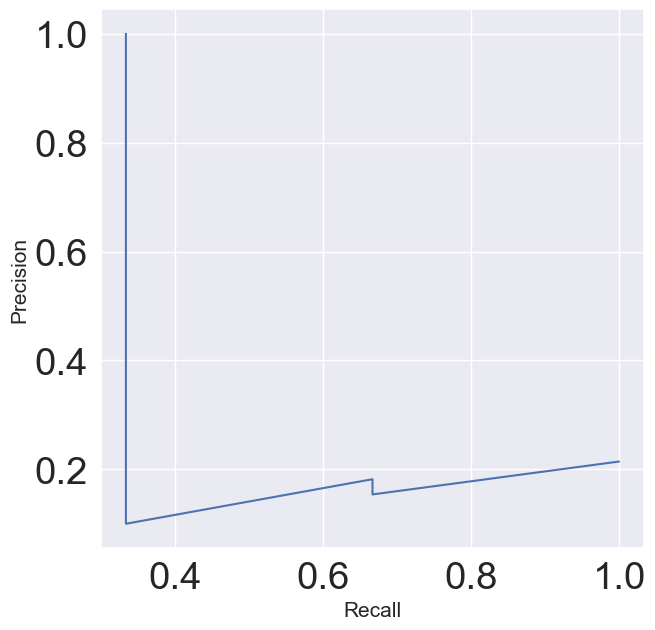

In [48]:
import matplotlib.pyplot as plt

y_true = [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 
          1, 0, 0, 0, 0, 0, 0, 0, 1, 0]
y_pred = [0.02638412, 0.11114267, 0.31620708,           
          0.0490937,  0.0191491,  0.17554844,        
          0.15952202, 0.03819563, 0.11639273, 
          0.079377,   0.08584789, 0.39095342, 
          0.27259048, 0.03447096, 0.04644807, 
          0.03543574, 0.18521942, 0.05934905, 
          0.61977213, 0.33056815] 

precisions = []
recalls = []
thresholds = [0.0490937 , 0.05934905, 0.079377,  
              0.08584789, 0.11114267, 0.11639273,  
              0.15952202, 0.17554844, 0.18521942,  
              0.27259048, 0.31620708, 0.33056815,  
              0.39095342, 0.61977213] 

for threshold in thresholds:
    prediction = [1 if x >= threshold else 0 for x in y_pred]
    p = precision(y_true, prediction)
    r = recall(y_true, prediction)
    precisions.append(p)
    recalls.append(r)

plt.figure(figsize=(7, 7))
plt.plot(recalls, precisions)
plt.xlabel('Recall', fontsize=15)
plt.ylabel('Precision', fontsize=15)

<h3 id="f1-score">F1 score</h3>

F1 score is a metric that combines both precision and recall. It is defined as a simple weighted average (harmonic mean) of precision and recall. If we denote precision using P and recall using R, we can represent the F1 score as:

$$
\text{F1} = \frac{2\text{PR}}{\text{P} + \text{R}} = \frac{2\text{TP}}{2\text{TP} + \text{FP} + \text{FN}}
$$

In [49]:
def f1(y_true, y_pred): 
    p = precision(y_true, y_pred) 
    r = recall(y_true, y_pred) 
    score = 2 * p * r / (p + r) if p + r != 0 else 0
    return score

y_true = [0, 0, 0, 1, 0, 0, 0, 0, 0, 0,      
          1, 0, 0, 0, 0, 0, 0, 0, 1, 0] 
y_pred = [0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 
          1, 0, 0, 0, 0, 0, 0, 0, 1, 0]

f1(y_true, y_pred)

0.5714285714285715

In [50]:
from sklearn.metrics import f1_score
f1_score(y_true, y_pred)

0.5714285714285714

When dealing with datasets that have **skewed targets**, we should look at F1 (or precision and recall) instead of accuracy. 

<h3 id="TPR">True Positive Rate(TPR)</h3>

$$
\text{TPR} = \frac{\text{TP}}{\text{TP} + \text{FN}}
$$

TPR or recall is also known as **sensitivity**. 

In [51]:
def tpr(y_true, y_pred):
    return recall(y_true, y_pred)

<h3 id="FPR">False Positive Rate(FPR)</h3>

$$
\text{FRP} = \frac{\text{FP}}{\text{TN} + \text{FP}}
$$

And $1 - \text{FPR}$ is known as **specificity** or **True Negative Rate**(TNR).

In [52]:
def fpr(y_true, y_pred):
    fp = false_positive(y_true, y_pred)
    tn = true_negative(y_true, y_pred)
    return fp / (tn + fp)

In [53]:
tpr_list = []
fpr_list = []

y_true = [0, 0, 0, 0, 1,
          0, 1, 0, 0, 1,
          0, 1, 0, 0, 1]
y_pred = [0.1, 0.3, 0.2, 0.6, 0.8, 
          0.05, 0.9, 0.5, 0.3, 0.66,
          0.3, 0.2, 0.85, 0.15, 0.99]
thresholds = [0, 0.1, 0.2, 0.3, 
              0.4, 0.5, 0.6, 0.7, 
              0.8, 0.85, 0.9, 0.99, 
              1.0]

for thresh in thresholds:
    temp_pred = [1 if x >= thresh else 0 for x in y_pred]
    temp_tpr = tpr(y_true, temp_pred)
    temp_fpr = fpr(y_true, temp_pred)
    tpr_list.append(temp_tpr)
    fpr_list.append(temp_fpr)

In [54]:
import pandas as pd

df = pd.DataFrame({
    'threshold': thresholds,
    'tpr': tpr_list,
    'fpr': fpr_list
})

df

,threshold,tpr,fpr
0,0.00,1.0,1.0
1,0.10,1.0,0.9
2,0.20,1.0,0.7
3,0.30,0.8,0.6
4,0.40,0.8,0.3
5,0.50,0.8,0.3
6,0.60,0.8,0.2
7,0.70,0.6,0.1
8,0.80,0.6,0.1
9,0.85,0.4,0.1


<h3 id="ROC & AUC">Receiver Operating Characteristic(ROC) & AUC</h3>

ROC curve will tell you how the threshold impacts false positive rate and true positive rate and thus, in turn, false positives and true positives. You should choose the threshold that is best suited for your problem and datasets.

2 ways to determine the best threshold in ROC curves: 

1. **Youden's J statistic**: $ \text{J} = \text{Sensitivity} + \text{Specificity} - 1 = \text{TPR} + (1 - \text{FPR}) - 1 $. The best threshold is at the point that maximizes the value of J.

2. **Distance to point (0, 1)**: The best threshold is at the point nearest to (0, 1).

And the area under ROC curve is called **AUC**. AUC values range from 0 to 1.

- AUC = 1 / 0 implies you may have a perfect model. If AUC = 0, try inverting the probabilities for the predictions.

- AUC = 0.5 implies that your predictions are random.

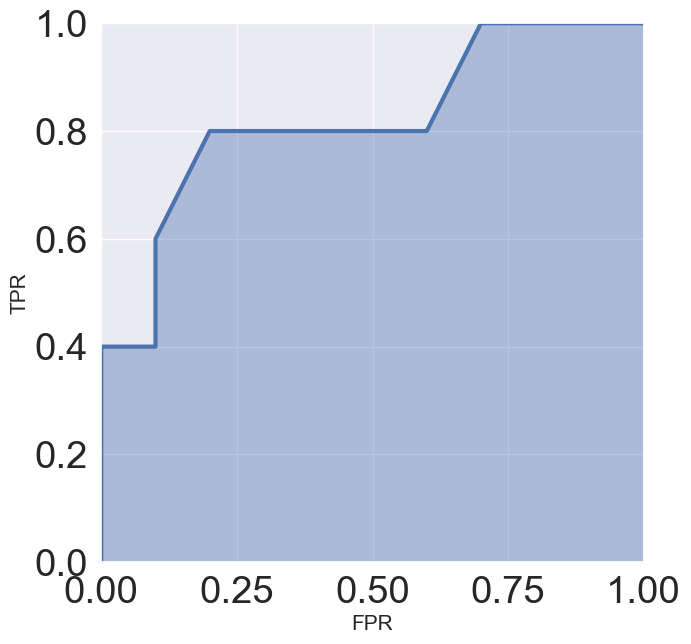

In [55]:
plt.figure(figsize=(7, 7)) 
plt.fill_between(fpr_list, tpr_list, alpha=0.4) 
plt.plot(fpr_list, tpr_list, lw=3) 
plt.xlim(0, 1.0) 
plt.ylim(0, 1.0) 
plt.xlabel('FPR', fontsize=15) 
plt.ylabel('TPR', fontsize=15) 
plt.show() 

<h3 id="logloss">Log Loss</h3> 

$$
\text{Log Loss} = -[\text{target} \cdot \log(\text{prediction}) + (1 - \text{target}) \cdot \log(1 - \text{prediction})]
$$

Where target is either 0 or 1 and prediction is a probability of a sample belonging to class 1

In [56]:
import numpy as np

def log_loss(y_true, y_proba):
    eps = 1e-12
    loss = []
    for yt, yp in zip(y_true, y_proba):
        # Clip the predicted probabilities to the range [eps, 1-eps] to avoid infinite or invalid values during logarithmic calculations 
        yp = np.clip(yp, eps, 1 - eps) 
        temp_loss = -1.0 * (yt * np.log(yp) + (1 - yt) * np.log(1 - yp))
        loss.append(temp_loss)
    return np.mean(loss)

log_loss(y_true, y_pred)

0.49882711861432294

In [57]:
from sklearn.metrics import log_loss
log_loss(y_true, y_pred)

0.49882711861432294

<h2 id="advanced-metrics-for-classification">Advanced Metrics For Classification</h2>

- [Macro-, Micro- \& Weighted-Precision](#advanced-precisions)
- [Weighted F1 Score](#advanced-f1-score)
- [Confusion Matrix](#confusion-matrix)

<h3 id="advanced-precisions">Macro-, Micro- & Weighted-Precision</h3>

In [58]:
def macro_precision(y_true, y_pred):
    num_classes = len(np.unique(y_true))
    total_precision = 0
    
    for class_ in range(num_classes):
        temp_true = [1 if p == class_ else 0 for p in y_true]
        temp_pred = [1 if p == class_ else 0 for p in y_pred]
        temp_precision = precision(temp_true, temp_pred)
        total_precision += temp_precision

    total_precision /= num_classes
    return total_precision

def micro_precision(y_true, y_pred):
    num_classes = len(np.unique(y_true))
    tp = 0
    fp = 0
    
    for class_ in range(num_classes):
        temp_true = [1 if p == class_ else 0 for p in y_true]
        temp_pred = [1 if p == class_ else 0 for p in y_pred]
        tp += true_positive(temp_true, temp_pred)
        fp += false_positive(temp_true, temp_pred)

    precision = tp / (tp + fp)
    return precision

from collections import Counter

def weighted_precision(y_true, y_pred):
    num_classes = len(np.unique(y_true))
    class_counts = Counter(y_true)
    overall_precision = 0

    for class_ in range(num_classes):
        temp_true = [1 if p == class_ else 0 for p in y_true]
        temp_pred = [1 if p == class_ else 0 for p in y_pred]
        
        temp_precision = precision(temp_true, temp_pred)

        weighted_precision = class_counts[class_] * temp_precision
        overall_precision += weighted_precision
    
    overall_precision = overall_precision / len(y_true)
    return overall_precision

In [59]:
from sklearn.metrics import precision_score

y_true = [0, 1, 2, 0, 1, 2, 0, 2, 2]
y_pred = [0, 2, 1, 0, 2, 1, 0, 0, 2]

my_macro_precision = macro_precision(y_true, y_pred)
sklearn_macro_precision = precision_score(y_true, y_pred, average='macro')

my_micro_precision = micro_precision(y_true, y_pred)
sklearn_micro_precision = precision_score(y_true, y_pred, average='micro')

my_weighted_precision = weighted_precision(y_true, y_pred)
sklearn_weighted_precision = precision_score(y_true, y_pred, average='weighted')

print(f'macro precision error: {my_macro_precision - sklearn_macro_precision}')
print(f'micro precision error: {my_micro_precision - sklearn_micro_precision}')
print(f'macro precision error: {my_weighted_precision - sklearn_weighted_precision}')

macro precision error: 0.0
micro precision error: 0.0
macro precision error: 0.0


<h3 id="advanced-f1-score">Weighted-F1 Score</h3>

In [60]:
def weighted_f1(y_true, y_pred):
    num_classes = len(np.unique(y_true))
    class_counts = Counter(y_true)
    overall_f1 = 0
    for class_ in range(num_classes):
        temp_true = [1 if p == class_ else 0 for p in y_true]
        temp_pred = [1 if p == class_ else 0 for p in y_pred]
        temp_f1 = f1(temp_true, temp_pred) * class_counts[class_]
        overall_f1 += temp_f1
    overall_f1 /= len(y_true)
    return overall_f1

my_weighted_f1 = weighted_f1(y_true, y_pred)
sklearn_weighted_f1 = f1_score(y_true, y_pred, average='weighted')
print(f'weighted f1 score error: {my_weighted_f1 - sklearn_weighted_f1}')

weighted f1 score error: 5.551115123125783e-17


<h3 id="confusion-matrix">Confusion Matrix</h3>

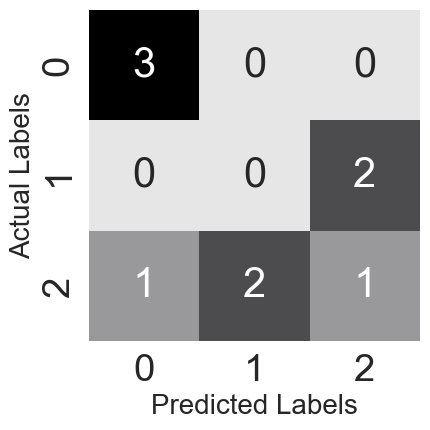

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

y_true = [0, 1, 2, 0, 1, 2, 0, 2, 2] 
y_pred = [0, 2, 1, 0, 2, 1, 0, 0, 2]

cm = metrics.confusion_matrix(y_true, y_pred)

plt.figure(figsize=(5, 5))
cmap = sns.cubehelix_palette(50, hue=0.05, rot=0, light=0.9, dark=0, as_cmap=True)
sns.set(font_scale=2.5)
sns.heatmap(cm, annot=True, cmap=cmap, cbar=False)
plt.ylabel('Actual Labels', fontsize=20) 
plt.xlabel('Predicted Labels', fontsize=20)
plt.tight_layout()
plt.show()

<h3 id="multi-label-classification-problem">Multi-lable Classification Problem</h3>

Related metrics:

- Precision at k, **P@k**.
- Average precision at k, **AP@k**.
- Mean average precision at k, **MAP@k**.
- **Log Loss**.

In [62]:
def pk(y_true, y_pred, k):
    if k == 0: 
        return 0
    return len(set(y_pred[:k]) & set(y_true)) / k

def apk(y_true, y_pred, k):
    precisions = []
    
    for i in range(k):
        precisions.append(pk(y_true, y_pred, i+1))

    return sum(precisions) / len(precisions) if precisions else 0

def mapk(y_true_list, y_pred_list, k):
    apk_values = []
    num_samples = len(y_true_list)
    for i in range(num_samples):
        apk_values.append(apk(y_true_list[i], y_pred_list[i], k=k))
    return sum(apk_values) / len(apk_values)

y_true = [[1, 2, 3], 
          [0, 2], 
          [1], 
          [2, 3], 
          [1, 0], 
          []] 
y_pred = [[0, 1, 2], 
          [1], 
          [0, 2, 3], 
          [2, 3, 4, 0], 
          [0, 1, 2], 
          [0]] 

for i in range(len(y_true)):
    for j in range(1, 4):
        print(f'y_true={y_true[i]}\ny_pred={y_pred[i]}\nAP@{j}={apk(y_true[i], y_pred[i], k=j)}\n')

map1 = mapk(y_true, y_pred, 1)
print(f'MAP@1={map1}')


y_true=[1, 2, 3]
y_pred=[0, 1, 2]
AP@1=0.0

y_true=[1, 2, 3]
y_pred=[0, 1, 2]
AP@2=0.25

y_true=[1, 2, 3]
y_pred=[0, 1, 2]
AP@3=0.38888888888888884

y_true=[0, 2]
y_pred=[1]
AP@1=0.0

y_true=[0, 2]
y_pred=[1]
AP@2=0.0

y_true=[0, 2]
y_pred=[1]
AP@3=0.0

y_true=[1]
y_pred=[0, 2, 3]
AP@1=0.0

y_true=[1]
y_pred=[0, 2, 3]
AP@2=0.0

y_true=[1]
y_pred=[0, 2, 3]
AP@3=0.0

y_true=[2, 3]
y_pred=[2, 3, 4, 0]
AP@1=1.0

y_true=[2, 3]
y_pred=[2, 3, 4, 0]
AP@2=1.0

y_true=[2, 3]
y_pred=[2, 3, 4, 0]
AP@3=0.8888888888888888

y_true=[1, 0]
y_pred=[0, 1, 2]
AP@1=1.0

y_true=[1, 0]
y_pred=[0, 1, 2]
AP@2=1.0

y_true=[1, 0]
y_pred=[0, 1, 2]
AP@3=0.8888888888888888

y_true=[]
y_pred=[0]
AP@1=0.0

y_true=[]
y_pred=[0]
AP@2=0.0

y_true=[]
y_pred=[0]
AP@3=0.0

MAP@1=0.3333333333333333


In [63]:
import numpy as np

def log_loss_multilabel(y_true, y_pred, eps=1e-15):
    y_pred = np.clip(y_pred, eps, 1 - eps)

    loss = -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

    return loss

y_true = np.array([[1, 0, 1], [0, 1, 0], [1, 0, 0]])
y_pred = np.array([[0.9, 0.1, 0.8], [0.2, 0.7, 0.3], [0.8, 0.2, 0.1]])

loss = log_loss_multilabel(y_true, y_pred)
print(f'Log Loss: {loss:.4f}')

Log Loss: 0.2136


<h2 id="basic-metrics-for-regression">Basic Metrics For Regression</h2>

- [MAE](#mae)
- [MSE \& RMSE](#mse-rmse)
- [MSLE \& RMSL](#msle-rmsle)
- [PE \& MPE \& MAPE](#pe-mpe-mape)
- [$\text{R}^2$](#r2)

<h3 id="mae">MAE</h3>

In [64]:
def mean_absolute_error(y_true, y_pred):
    error = np.abs(y_true - y_pred)
    mae = np.mean(error)
    return mae

y_true = np.array([1.1, 1.2, 1.3, 1.4, 1.5])
y_pred = np.array([0.9, 1.1, 1.13, 1.4, 1.52])

mean_absolute_error(y_true, y_pred)

0.09800000000000002

<h3 id="mse-rmse">MSE & RMSE<h3>

In [65]:
def mean_squared_error(y_true, y_pred):
    error = np.square(y_true - y_pred)
    mse = np.mean(error)
    return mse

def root_mean_squared_error(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    return np.sqrt(mse)

y_true = np.array([1.1, 1.2, 1.3, 1.4, 1.5])
y_pred = np.array([0.9, 1.1, 1.13, 1.4, 1.52])
print(f'MSE: {mean_squared_error(y_true, y_pred)}')
print(f'RMSE: {root_mean_squared_error(y_true, y_pred)}')

MSE: 0.01586000000000001
RMSE: 0.12593649193144935


<h3 id='msle-rmsle'>MSLE & RMSLE</h3>

In [66]:
def mean_squared_log_error(y_true, y_pred):
    error = np.log1p(y_true) - np.log1p(y_pred)
    msle = np.mean(error)
    return msle

def root_mean_squared_log_error(y_true, y_pred):
    msle = mean_squared_log_error(y_true, y_pred)
    return np.sqrt(msle)

y_true = np.array([1e-9, 1.2, 1.3, 1.4, 1.5])
y_pred = np.array([1e-9, 1.1, 1.13, 1.4, 1.52])
print(f'MSLE: {mean_squared_log_error(y_true, y_pred)}')
print(f'RMSLE: {root_mean_squared_error(y_true, y_pred)}')

MSLE: 0.023067797839897274
RMSLE: 0.08865664103720602


<h3 id='pe-mpe-mape'>PE & MPE & MAPE</h3>

$$
\text{PE} = \frac{\text{True Value} - \text{Predicted Value}}{\text{True Value}}
$$

In [67]:
def mean_percentage_error(y_true, y_pred):
    pe = (y_true - y_pred) / y_true
    mpe = np.mean(pe)
    return mpe

def mean_abs_percentage_error(y_true, y_pred):
    ape = np.abs(y_true - y_pred) / y_true
    mape = np.mean(ape)
    return mape

y_true = np.array([3, 3, 3, 3, 3])
y_pred = np.array([3.3, 3.2, 2.9, 2.8, 3.0])
print(f'MPE: {mean_percentage_error(y_true, y_pred)}')
print(f'MAPE: {mean_abs_percentage_error(y_true, y_pred)}')

MPE: -0.013333333333333317
MAPE: 0.053333333333333344


<h3 id='r2'>R<sup>2</h3>

Also known as the **coefficient of determination**. 

$$
\text{R}^2 = 1 - \frac{\sum_{i=1}^{N} (y_{t_i} - y_{p_i})^2}{\sum_{i=1}^{N} (y_{t_i} - \bar{y_t})}
$$

In [68]:
def r2(y_true, y_pred):
    y_true_mean = np.mean(y_true)
    r2 = 1 - np.sum(np.square(y_true - y_pred)) / np.sum(np.square(y_true - y_true_mean))
    return r2

y_true = np.array([3.31, 3.19, 2.91, 2.81, 3.0])
y_pred = np.array([3.3, 3.2, 2.9, 2.8, 3.0])
print(f'R^2: {r2(y_true, y_pred)}')

R^2: 0.9976007677543185


<h2 id='advanced-metrics-for-regression'>Advanced Metrics For Regression</h2>

- [QWK](#qwk)
- [MCC](#mcc)

<h3 id='qwk'>QWK</h3>

In [69]:
from sklearn import metrics

y_true = [1, 2, 3, 1, 2, 3, 1, 2, 3]
y_pred = [2, 1, 3, 1, 2, 3, 3, 1, 2]

print(metrics.cohen_kappa_score(y_true, y_pred, weights='quadratic'))
print(metrics.accuracy_score(y_true, y_pred))

0.33333333333333337
0.4444444444444444


<h3 id='mcc'>MCC</h3>

**Matthew's Correlation Coefficient**(MCC) ranges from -1 to 1. 1 is perfect prediction while -1 is imperfect, and 0 is random prediction.

$$
\text{MCC} = \frac{\text{TP} \cdot \text{TN} - \text{FP} \cdot \text{FN}}
{\sqrt{(\text{TP} + \text{FP}) \cdot (\text{FN} + \text{TN}) \cdot (\text{FP} + \text{TN}) \cdot (\text{TP} + \text{FN})}}
$$

In [70]:
def mcc(y_true, y_pred): 
    tp = true_positive(y_true, y_pred) 
    tn = true_negative(y_true, y_pred) 
    fp = false_positive(y_true, y_pred) 
    fn = false_negative(y_true, y_pred) 
    
    numerator = (tp * tn) - (fp * fn) 
    denominator = ((tp + fp) * 
                   (fn + tn) * 
                   (fp + tn) * 
                   (tp + fn)) 
    denominator = denominator ** 0.5 
    if denominator == 0:
        return 0
    else:
        return numerator / denominator

y_true = [1, 2, 3, 1, 2, 3, 1, 2, 3]
y_pred = [2, 1, 3, 1, 2, 3, 3, 1, 2]
mcc(y_true, y_pred)

0